<a href="https://colab.research.google.com/github/Gaurs86/ML-Assignments/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import os


#Generating Data

In [7]:
def get_y(x):
    return 10 + x*x

def sample_data(n=10000, scale=100):
    data = []
    x = scale * (np.random.random_sample((n,)) - 0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n]).astype(np.float32)


#Generator & Discriminator

In [8]:
# ----------------------------
# Generator
# ----------------------------
class Generator(nn.Module):
    def __init__(self, hsize=[16, 16], z_dim=2, out_dim=2):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, hsize[0]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[0], hsize[1]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[1], out_dim)
        )
    def forward(self, z):
        return self.net(z)

# ----------------------------
# Discriminator
# ----------------------------
class Discriminator(nn.Module):
    def __init__(self, hsize=[16, 16], in_dim=2):
        super(Discriminator, self).__init__()
        self.feature = nn.Sequential(
            nn.Linear(in_dim, hsize[0]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[0], hsize[1]),
            nn.LeakyReLU(0.2),
            nn.Linear(hsize[1], 2)   # feature representation
        )
        self.out = nn.Linear(2, 1)  # final logit
    def forward(self, x):
        h = self.feature(x)
        out = self.out(h)
        return out, h

#Setup

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCEWithLogitsLoss()
g_optimizer = optim.RMSprop(G.parameters(), lr=0.001)
d_optimizer = optim.RMSprop(D.parameters(), lr=0.001)

#Training Loop

Iterations: 0	 Discriminator loss: 0.7409	 Generator loss: 0.8501


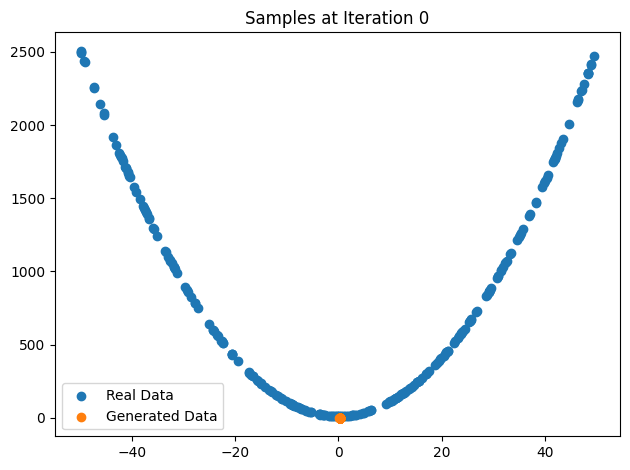

Iterations: 100	 Discriminator loss: 0.5272	 Generator loss: 1.2779
Iterations: 200	 Discriminator loss: 0.8775	 Generator loss: 1.3068
Iterations: 300	 Discriminator loss: 1.3948	 Generator loss: 0.7161
Iterations: 400	 Discriminator loss: 1.2963	 Generator loss: 1.3116
Iterations: 500	 Discriminator loss: 1.2160	 Generator loss: 1.3925
Iterations: 600	 Discriminator loss: 1.2780	 Generator loss: 0.5376
Iterations: 700	 Discriminator loss: 1.2539	 Generator loss: 0.7051
Iterations: 800	 Discriminator loss: 1.2254	 Generator loss: 0.7665
Iterations: 900	 Discriminator loss: 1.2483	 Generator loss: 0.7161
Iterations: 1000	 Discriminator loss: 1.2161	 Generator loss: 0.7556


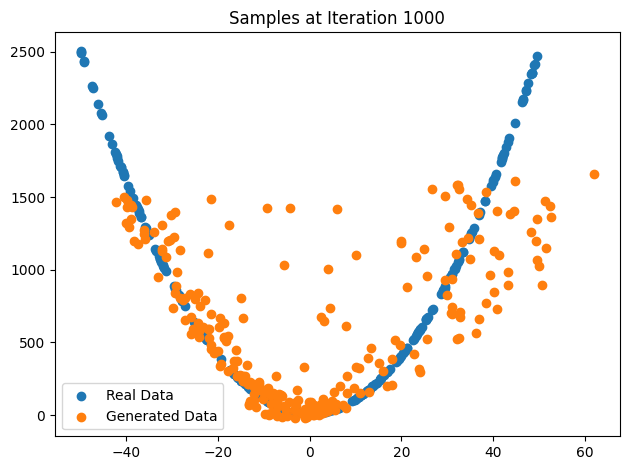

Iterations: 1100	 Discriminator loss: 1.1971	 Generator loss: 0.8078
Iterations: 1200	 Discriminator loss: 1.2048	 Generator loss: 0.7678
Iterations: 1300	 Discriminator loss: 1.2277	 Generator loss: 0.8367
Iterations: 1400	 Discriminator loss: 1.3027	 Generator loss: 0.6995
Iterations: 1500	 Discriminator loss: 1.2034	 Generator loss: 0.8152
Iterations: 1600	 Discriminator loss: 1.2641	 Generator loss: 0.7238
Iterations: 1700	 Discriminator loss: 1.2235	 Generator loss: 0.7968
Iterations: 1800	 Discriminator loss: 1.3152	 Generator loss: 0.7482
Iterations: 1900	 Discriminator loss: 1.2496	 Generator loss: 0.8037
Iterations: 2000	 Discriminator loss: 1.2483	 Generator loss: 0.6037


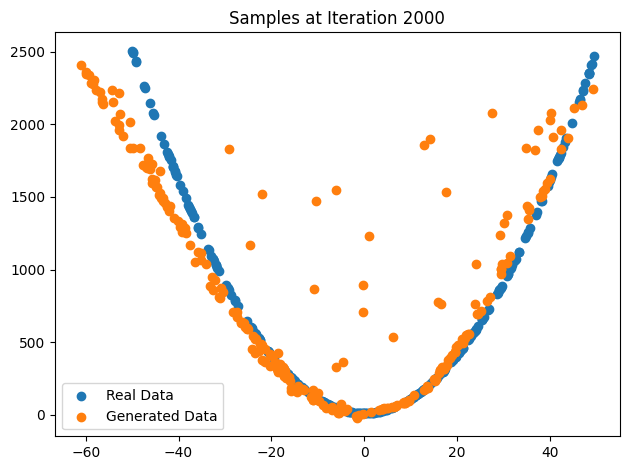

Iterations: 2100	 Discriminator loss: 1.1844	 Generator loss: 0.5369
Iterations: 2200	 Discriminator loss: 1.1643	 Generator loss: 0.7370
Iterations: 2300	 Discriminator loss: 1.3577	 Generator loss: 0.6076
Iterations: 2400	 Discriminator loss: 1.1908	 Generator loss: 0.7284
Iterations: 2500	 Discriminator loss: 1.2631	 Generator loss: 0.6750
Iterations: 2600	 Discriminator loss: 1.1118	 Generator loss: 0.7978
Iterations: 2700	 Discriminator loss: 1.1805	 Generator loss: 0.5181
Iterations: 2800	 Discriminator loss: 1.2137	 Generator loss: 0.6335
Iterations: 2900	 Discriminator loss: 1.3055	 Generator loss: 0.8402
Iterations: 3000	 Discriminator loss: 1.0972	 Generator loss: 0.6016


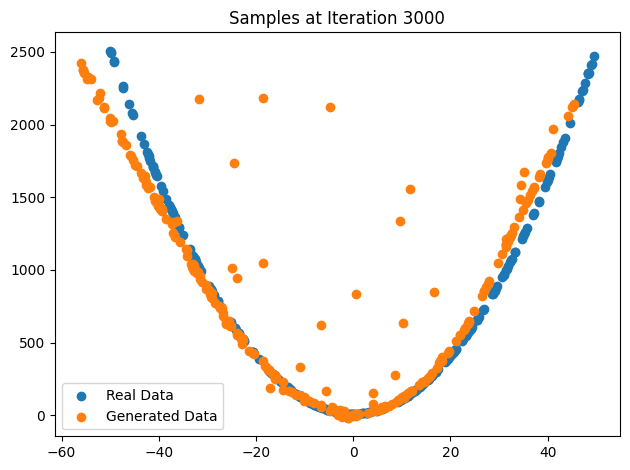

Iterations: 3100	 Discriminator loss: 1.1479	 Generator loss: 0.6405
Iterations: 3200	 Discriminator loss: 1.3008	 Generator loss: 0.6986
Iterations: 3300	 Discriminator loss: 1.0927	 Generator loss: 0.7031
Iterations: 3400	 Discriminator loss: 1.1147	 Generator loss: 0.8702
Iterations: 3500	 Discriminator loss: 1.1481	 Generator loss: 0.7079
Iterations: 3600	 Discriminator loss: 1.1828	 Generator loss: 0.6866
Iterations: 3700	 Discriminator loss: 1.1111	 Generator loss: 0.6415
Iterations: 3800	 Discriminator loss: 1.1375	 Generator loss: 0.6179
Iterations: 3900	 Discriminator loss: 1.2601	 Generator loss: 0.7196
Iterations: 4000	 Discriminator loss: 1.2048	 Generator loss: 0.8695


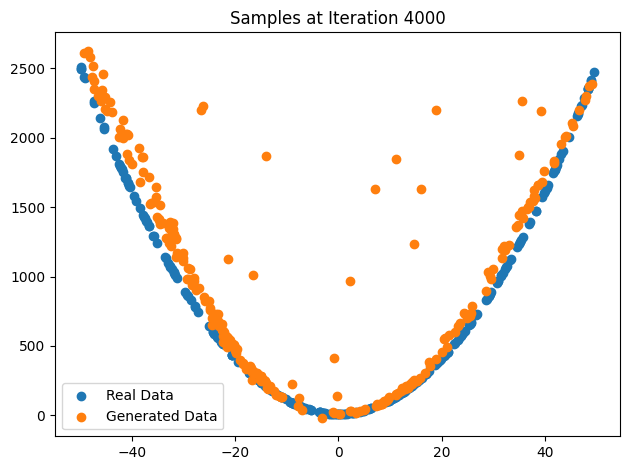

Iterations: 4100	 Discriminator loss: 1.3921	 Generator loss: 0.8319
Iterations: 4200	 Discriminator loss: 1.1646	 Generator loss: 0.9506
Iterations: 4300	 Discriminator loss: 1.2709	 Generator loss: 0.8824
Iterations: 4400	 Discriminator loss: 1.2827	 Generator loss: 0.6816
Iterations: 4500	 Discriminator loss: 1.3108	 Generator loss: 0.7749
Iterations: 4600	 Discriminator loss: 1.1639	 Generator loss: 0.6465
Iterations: 4700	 Discriminator loss: 1.2095	 Generator loss: 0.7016
Iterations: 4800	 Discriminator loss: 1.3331	 Generator loss: 0.7545
Iterations: 4900	 Discriminator loss: 1.2412	 Generator loss: 0.5551
Iterations: 5000	 Discriminator loss: 1.2388	 Generator loss: 0.8483


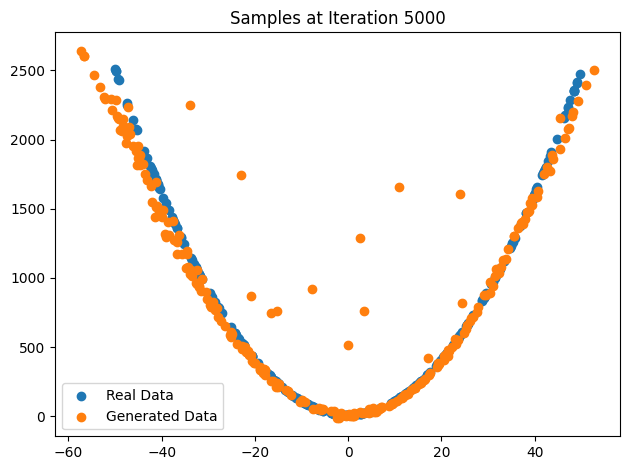

Iterations: 5100	 Discriminator loss: 1.3038	 Generator loss: 0.5914
Iterations: 5200	 Discriminator loss: 1.2365	 Generator loss: 0.8232
Iterations: 5300	 Discriminator loss: 1.0059	 Generator loss: 0.5791
Iterations: 5400	 Discriminator loss: 1.0870	 Generator loss: 0.7507
Iterations: 5500	 Discriminator loss: 1.1769	 Generator loss: 1.0424
Iterations: 5600	 Discriminator loss: 1.2414	 Generator loss: 1.0887
Iterations: 5700	 Discriminator loss: 1.4505	 Generator loss: 1.0242
Iterations: 5800	 Discriminator loss: 1.2305	 Generator loss: 0.9326
Iterations: 5900	 Discriminator loss: 1.1358	 Generator loss: 0.4793
Iterations: 6000	 Discriminator loss: 1.6493	 Generator loss: 0.9286


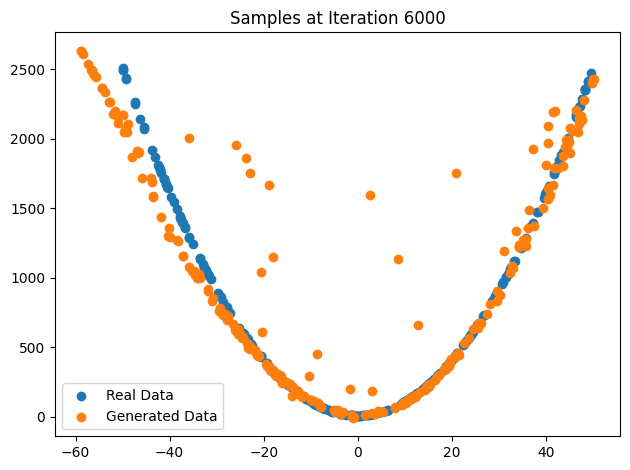

Iterations: 6100	 Discriminator loss: 1.2951	 Generator loss: 1.0371
Iterations: 6200	 Discriminator loss: 1.5345	 Generator loss: 0.6237
Iterations: 6300	 Discriminator loss: 1.2617	 Generator loss: 0.8342
Iterations: 6400	 Discriminator loss: 1.1427	 Generator loss: 0.7881
Iterations: 6500	 Discriminator loss: 1.6394	 Generator loss: 0.9449
Iterations: 6600	 Discriminator loss: 1.2060	 Generator loss: 0.7529
Iterations: 6700	 Discriminator loss: 1.2449	 Generator loss: 0.8654
Iterations: 6800	 Discriminator loss: 1.2584	 Generator loss: 0.8491
Iterations: 6900	 Discriminator loss: 1.1321	 Generator loss: 0.8197
Iterations: 7000	 Discriminator loss: 1.2895	 Generator loss: 0.9003


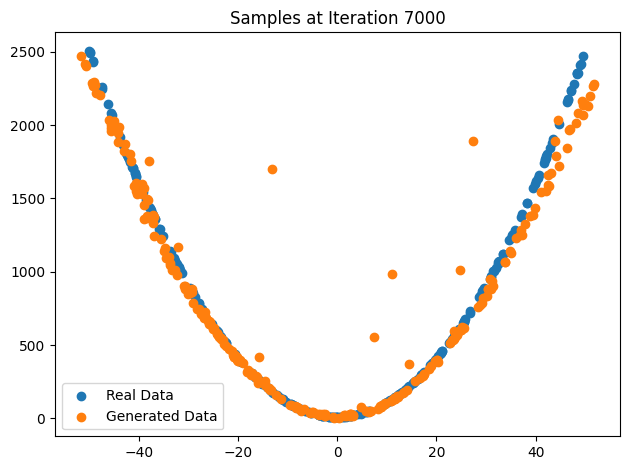

Iterations: 7100	 Discriminator loss: 1.2366	 Generator loss: 0.8375
Iterations: 7200	 Discriminator loss: 1.0673	 Generator loss: 0.4621
Iterations: 7300	 Discriminator loss: 1.2376	 Generator loss: 0.8758
Iterations: 7400	 Discriminator loss: 1.2018	 Generator loss: 0.9024
Iterations: 7500	 Discriminator loss: 1.2925	 Generator loss: 0.7664
Iterations: 7600	 Discriminator loss: 1.2707	 Generator loss: 1.0216
Iterations: 7700	 Discriminator loss: 1.2944	 Generator loss: 0.8552
Iterations: 7800	 Discriminator loss: 1.2454	 Generator loss: 0.7937
Iterations: 7900	 Discriminator loss: 1.2431	 Generator loss: 0.8513
Iterations: 8000	 Discriminator loss: 1.2205	 Generator loss: 0.8679


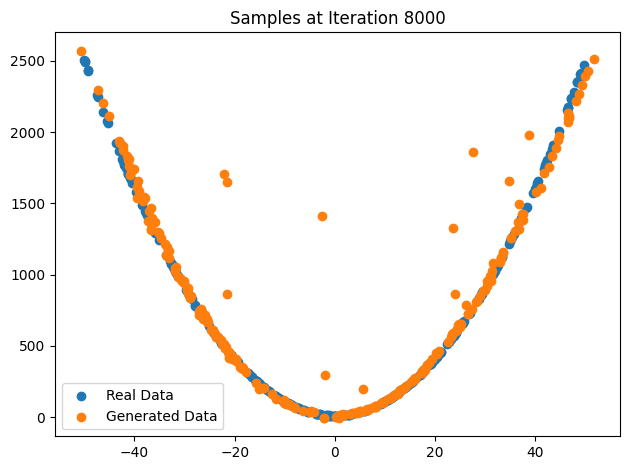

Iterations: 8100	 Discriminator loss: 1.4607	 Generator loss: 1.2405
Iterations: 8200	 Discriminator loss: 1.2469	 Generator loss: 0.8666
Iterations: 8300	 Discriminator loss: 1.1250	 Generator loss: 0.8102
Iterations: 8400	 Discriminator loss: 1.2397	 Generator loss: 1.1086
Iterations: 8500	 Discriminator loss: 1.3853	 Generator loss: 0.8589
Iterations: 8600	 Discriminator loss: 1.2466	 Generator loss: 0.8580
Iterations: 8700	 Discriminator loss: 1.2587	 Generator loss: 1.0675
Iterations: 8800	 Discriminator loss: 1.5154	 Generator loss: 1.1677
Iterations: 8900	 Discriminator loss: 1.3179	 Generator loss: 1.0109
Iterations: 9000	 Discriminator loss: 1.3484	 Generator loss: 0.9136


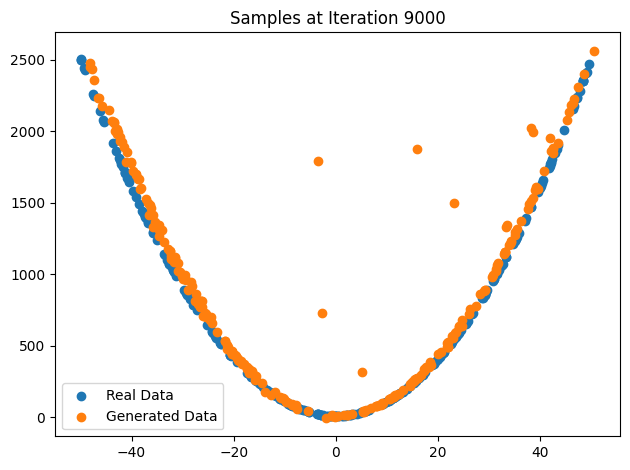

Iterations: 9100	 Discriminator loss: 1.2176	 Generator loss: 1.2142
Iterations: 9200	 Discriminator loss: 1.1749	 Generator loss: 0.9836
Iterations: 9300	 Discriminator loss: 1.2474	 Generator loss: 1.1217
Iterations: 9400	 Discriminator loss: 1.2958	 Generator loss: 0.9263
Iterations: 9500	 Discriminator loss: 1.2559	 Generator loss: 0.9161
Iterations: 9600	 Discriminator loss: 1.2460	 Generator loss: 0.8628
Iterations: 9700	 Discriminator loss: 1.2076	 Generator loss: 0.9962
Iterations: 9800	 Discriminator loss: 1.5538	 Generator loss: 1.2140
Iterations: 9900	 Discriminator loss: 1.1127	 Generator loss: 0.8023
Iterations: 10000	 Discriminator loss: 1.2694	 Generator loss: 1.0004


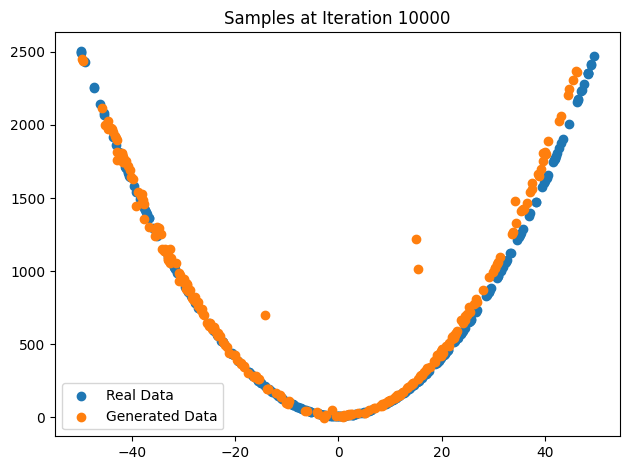

In [10]:
epochs = 10001
batch_size=256
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size).astype(np.float32)


for epoch in range(epochs):


    X_batch = sample_data(n=batch_size).astype(np.float32)
    Z_batch = sample_Z(batch_size, 2)

    X_batch = torch.tensor(X_batch, device=device)
    Z_batch = torch.tensor(Z_batch, device=device)


    # -----------------
    # Train Discriminator
    # -----------------
    for _ in range(nd_steps):
        d_optimizer.zero_grad()

        r_logits, r_rep = D(X_batch)
        f_logits, g_rep = D(G(Z_batch).detach())

        d_loss_real = criterion(r_logits, torch.ones_like(r_logits))
        d_loss_fake = criterion(f_logits, torch.zeros_like(f_logits))
        d_loss = d_loss_real + d_loss_fake

        d_loss.backward()
        d_optimizer.step()

    rrep_dstep, grep_dstep = r_rep.detach().cpu().numpy(), g_rep.detach().cpu().numpy()

    # -----------------
    # Train Generator
    # -----------------
    for _ in range(ng_steps):
        g_optimizer.zero_grad()
        fake = G(Z_batch)
        f_logits, g_rep = D(fake)
        g_loss = criterion(f_logits, torch.ones_like(f_logits))
        g_loss.backward()
        g_optimizer.step()

    rrep_gstep, grep_gstep = r_rep.detach().cpu().numpy(), g_rep.detach().cpu().numpy()

    # -----------------
    # Print progress
    # -----------------

    if epoch % 100 == 0:
        print(f"Iterations: {epoch}\t Discriminator loss: {d_loss.item():.4f}\t Generator loss: {g_loss.item():.4f}")

    # -------------------
    # Visualization
    # -------------------
    if epoch % 1000 == 0:
        with torch.no_grad():
            g_plot = G(Z_batch).cpu().numpy()

        plt.figure()
        xax = plt.scatter(x_plot[:, 0], x_plot[:, 1])
        gax = plt.scatter(g_plot[:, 0], g_plot[:, 1])
        plt.legend((xax, gax), ("Real Data", "Generated Data"))
        plt.title(f'Samples at Iteration {epoch}')
        plt.tight_layout()
        plt.show()
